### Task 1
You have some dataset describing concentrations of five algae metabolites. For each algae
there is species name, its genus and its group.

● Using pandas library find the average concentration of each of the metabolite in each
aglae genus.

● Visualize the result using seaborn library.

In [6]:
import pandas as pd
import seaborn as sns

In [14]:
metab = pd.read_csv("/Users/GuloLynx/Downloads/metabolites.csv")
metab


,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [93]:
metab = metab.groupby("genus", as_index=False).aggregate({"sucrose": "mean", "alanin": "mean", "citrate": "mean", "glucose": "mean", "oleic_acid": "mean"} )
metab

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [92]:
list(metab)

['genus', 'sucrose', 'alanin', 'citrate', 'glucose', 'oleic_acid']

In [85]:
metab.dtypes

species        object
genus          object
group          object
sucrose       float64
alanin        float64
citrate       float64
glucose       float64
oleic_acid    float64
dtype: object

In [94]:
metab_melt = metab.melt(id_vars = 'genus')

metab_melt

,genus,variable,value
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


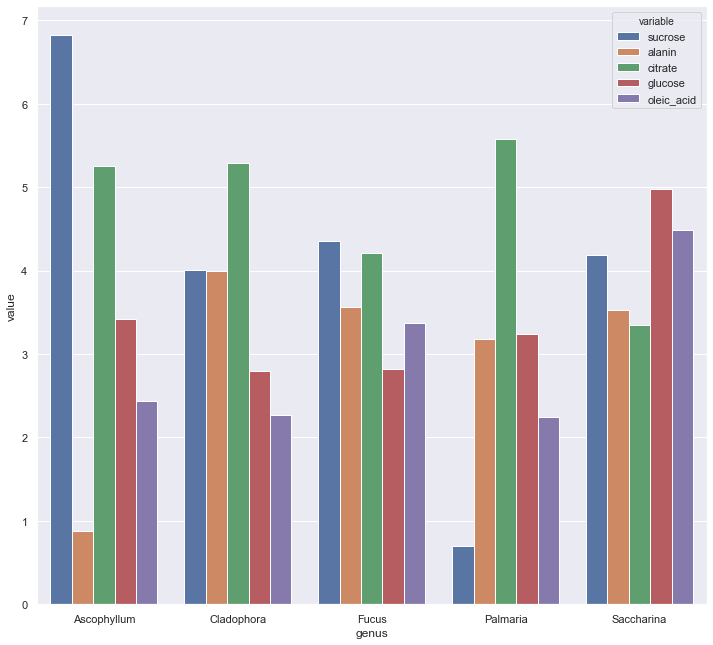

In [99]:
plot = sns.barplot(x="genus", y="value", hue = 'variable', data = metab_melt)

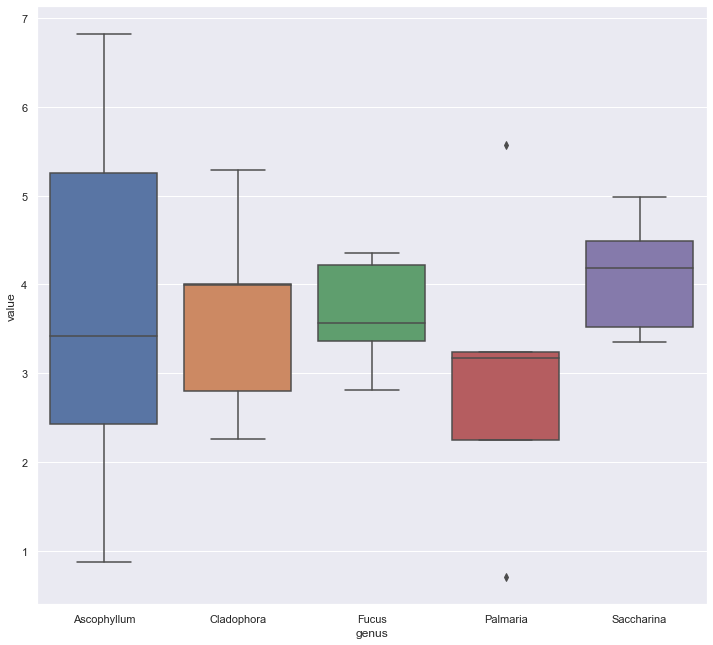

In [101]:
sns.boxplot(x="genus", y="value", data=metab_melt)


### Task 2
You have noticed that map() function returns something different than list. Simply saying, it
returns iterator. Up to this point, we used list(map(...)) syntax, but remember that iterators in
some cases are more preferable than lists.
This task is devoted to understanding how iterators work.

● First create iterator via my_iter = map(lambda ...) construction that takes [1,2,3,4,5,6]
and returns True if there is no remainder after division of the list’s element on 3 and
returns False otherwise.

● In infinite loop proceed the iterator using the next() function on it. Observe the appearing
error in this loop.

● Write except block catching this particular error.

● Based on this usecase try to understand in which cases iterators might be more
preferable than lists.

In [69]:
my_iter = map(lambda x: x % 3 == 0, [1,2,3,4,5,6])

for i in my_iter:
    print(i)


False
False
True
False
False
True


In [68]:
next(my_iter)

False

In [70]:
while True:
    next(my_iter)

StopIteration: 

In [71]:
while True:
    try:
        next(my_iter)
    except StopIteration:
        break

### Task3
In this task, you need to use API of numbersapi.com site.

You are given a set of numbers: 17, 45, 999, 1883. For each of the numbers, you need to find
out if there is an interesting mathematical or historical fact about it. The answer should contain
these facts marked as “math” or “hist”.

In [107]:
import requests


numbers = [17, 45, 999, 1883]
for num in numbers:
    response = requests.get("http://numbersapi.com/" + str(num))
    print("\n" + response.text)


17 is the number of the raka'ahs that Muslims perform during Salah on a daily basis.

45 is the sapphire wedding anniversary in years of marriage.

999 is a boring number.

1883 is a boring number.
